# Задание

Задача 3. Разработка многофакторной модели для оценки стоимости недвижимости в заданном регионе на основе гибридных подходов с использованием языка программирования Python.
1. Собрать данные по стоимости недвижимости в выбранном регионе.
2. Выбрать признаки, влияющие на стоимость разных типов недвижимости в регионе.
3. Вдвинуть гипотезы о том, какие признаки наиболее и наименее влияют на стоимость разных типов недвижимости ,  проверить гипотезы.
4. Смоделировать модель прогнозирования стоимости разных видов недвижимости в выбранном регионе на основе разных методов обучения, сравнить эффективность моделей.
5. Дать рекомендации покупателям и продавцам недвижимости. 

Данные должны быть 2025 года

# 1. Сбор данных

In [11]:
from cianparser import CianParser
import pandas as pd

parser = CianParser(location="Москва")

flats = parser.get_flats(
    deal_type="sale",
    rooms=(1, 2, 3),
    additional_settings={
        "start_page": 1,
        "end_page": 80,
        "only_flat": True,
        # "sort_by": "price_from_min_to_max"
    }
)

df = pd.DataFrame(flats)
df.to_csv("flats.csv", index=False, encoding="utf-8-sig")


                              Preparing to collect information from pages..
The page from which the collection of information begins: 
 https://cian.ru/cat.php?engine_version=2&p=1&with_neighbors=0&region=1&deal_type=sale&offer_type=flat&room1=1&room2=1&room3=1&only_flat=1

 1 | 1 page with list: [=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>] 100% | Count of all parsed: 28. Progress ratio: 2 %. Average price: 333 356 876 rub
 2 | 2 page with list: [=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>] 100% | Count of all parsed: 50. Progress ratio: 3 %. Average price: 366 739 182 rub
 3 | 3 page with list: [=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>] 100% | Count of all parsed: 76. Progress ratio: 4 %. Average price: 392 145 678 rub
 4 | 4 page with list: [=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>] 100% | Count of all parsed: 101. Progress ratio: 5 %. Average price: 428 274 593 rub
 5 | 5 page with list: [=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=>=

# 2. Выбор признаков

In [12]:
features = [
    "price",                # цена - таргет
    "district",             # район
    "underground",          # метро
    "street",               # улица
    "house_number",         # номер дома
    "floor",                # этаж
    "floors_count",         # этажей в доме
    "total_meters",         # общая площадь
    "rooms_count",          # комнаты
    "residential_complex",  # название ЖК
    "url"                   # ссылка (пригодится)
]
df = df[features]
df.to_csv("flats_cut.csv", index=False, encoding="utf-8-sig")

# Обработка датасета (импорт из файла)

In [38]:
import pandas as pd
df = pd.read_csv("flats_cut.csv")
print(df.shape)
df.head()

(1459, 11)


,price,district,underground,street,house_number,floor,floors_count,total_meters,rooms_count,residential_complex,url
0,62598031.0,Дорогомилово,Москва-Сити,NaN,NaN,11,18,45.8,2,Бадаевский ЖК,https://www.cian.ru/sale/flat/313877981/
1,76250000.0,Пресненский,Москва-Сити,Краснопресненская набережная,14Ак1,25,61,61.0,2,Capital Towers,https://www.cian.ru/sale/flat/315795006/
2,28172548.0,Даниловский,Павелецкая,NaN,NaN,6,27,40.5,2,Эра ЖК,https://www.cian.ru/sale/flat/301260611/
3,103000000.0,Красносельский,Сухаревская,переулок Даев,31С2,5,5,152.0,3,NaN,https://www.cian.ru/sale/flat/317646469/
4,89850000.0,Пресненский,Улица 1905 года,NaN,NaN,2,22,99.7,2,Лайф Тайм ЖК,https://www.cian.ru/sale/flat/316363605/


In [39]:
df.isna().sum()

price                   30
district                99
underground              6
street                  88
house_number            92
floor                    0
floors_count             0
total_meters             0
rooms_count              0
residential_complex    567
url                      0
dtype: int64

In [40]:
df = df.dropna(subset=["district", "underground", "street", "house_number"])

In [41]:
df['price'] = df['price'].fillna(df['price'].median())

In [42]:
print(df['residential_complex'].unique())

['Capital Towers' nan 'Крылья' 'Корона Эйр' 'Hide' 'Клубный квартал '
 'Малая Бронная 15' 'Монблан' 'Береговой-2' 'Клубный дом "OPUS"'
 'Дом Серебряный Бор' 'ЗИЛАРТ' 'Nicole'
 'Собрание клубных домов West Garden' 'LUCE' 'RedSide' 'Береговой' 'Lunar'
 'FORST' 'мой адрес На Береговом' 'Континенталь' 'SAVVIN RIVER RESIDENCE'
 'Водный' 'Царицыно' 'Река' 'Династия' 'Садовые кварталы' 'Прайм Парк'
 'Дом на Беговой' 'PAVE' 'Жизнь на Плющихе' 'Wellton park'
 'Дом Достижение' 'Интонация' 'Английский квартал' 'Мещерский лес'
 'Исторический дом ' 'Квартал Шуваловский' 'Адмирал' 'Сердце Столицы'
 'Никитский-6' 'ДОМ XXII' 'TopHills' 'Собрание клубных домов ORDYNKA'
 'Кленовый DOM' 'Вишневый сад' 'Эталон-Сити' 'Талисман на Рокоссовского'
 'Lucky' 'Кутузов Град' 'Sky House' 'Панорама' 'Sydney Prime'
 'Level Причальный' 'Eniteo' 'Клубный дом Forum' 'Советник' 'Mod' 'ARTEL'
 'Дом на Мосфильмовской' 'VERY' 'Символ' 'Лесной дом' 'Рихард'
 'Среда на Кутузовском ЖК' 'Среда на Лобачевского ЖК' 'Западный пор

In [43]:
df['residential_complex'] = df['residential_complex'].fillna('Без ЖК')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1246 entries, 1 to 1458
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                1246 non-null   float64
 1   district             1246 non-null   object 
 2   underground          1246 non-null   object 
 3   street               1246 non-null   object 
 4   house_number         1246 non-null   object 
 5   floor                1246 non-null   int64  
 6   floors_count         1246 non-null   int64  
 7   total_meters         1246 non-null   float64
 8   rooms_count          1246 non-null   int64  
 9   residential_complex  1246 non-null   object 
 10  url                  1246 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 116.8+ KB


# 3. Гипотезы и их проверка

1. Чем больше общая площадь квартиры (total_meters), тем выше её цена.
2. Квартиры в центральных районах (district) стоят дороже, чем в спальных.
3. Близость к метро (underground) увеличивает стоимость квартиры.
4. Наличие жилого комплекса (residential_complex) повышает цену объекта.
5. Этаж (floor) почти не влияет на цену, если дом не высокий.
6. Название улицы (street) и номер дома (house_number) не влияют на цену.
7. Количество комнат (rooms_count) напрямую связано с ценой, но не линейно.

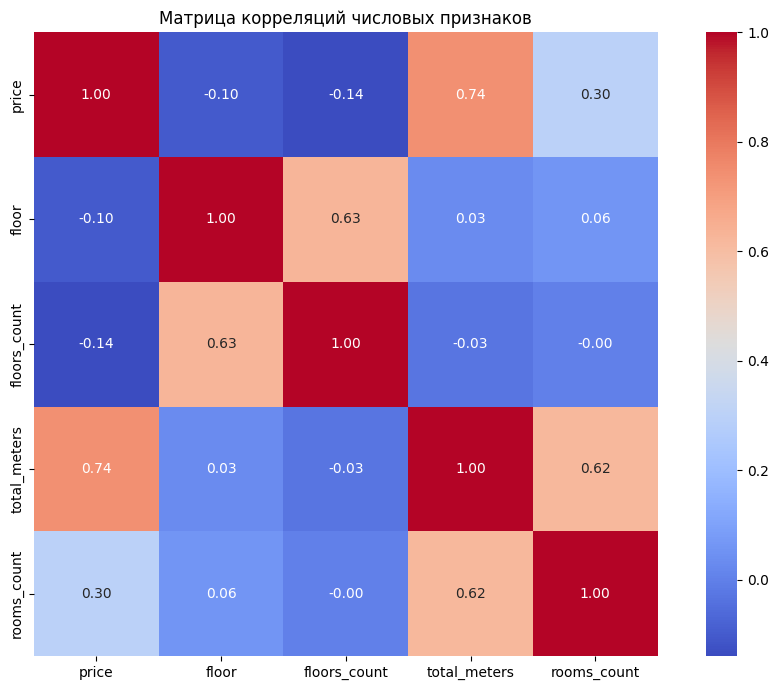

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = [
    "price", "floor", "floors_count", "total_meters", "rooms_count"
]
corr_matrix = df[numeric_cols].corr().round(2)

plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Матрица корреляций числовых признаков")
plt.tight_layout()
plt.show()

In [60]:
from scipy.stats import pearsonr, f_oneway

# Гипотеза 1
corr_result = df[['total_meters', 'price']].dropna()
corr_coef, corr_p = pearsonr(corr_result['total_meters'], corr_result['price'])
print(f"1: {corr_coef}, {corr_p}")

# Гипотеза 2
anova_df = df[['district', 'price']].dropna()
district_groups = [g['price'].values for _, g in anova_df.groupby('district')]
anova_f_district, anova_p_district = f_oneway(*district_groups)
print(f"2: {anova_f_district}, {anova_p_district}")

# Гипотеза 3
anova_df2 = df[['underground', 'price']].dropna()
underground_groups = [g['price'].values for _, g in anova_df2.groupby('underground')]
anova_f_underground, anova_p_underground = f_oneway(*underground_groups)
print(f"3: {anova_f_underground}, {anova_p_underground}")

# Гипотеза 4: ANOVA по residential_complex
anova_df4 = df[['residential_complex', 'price']].dropna()
res_groups = [g['price'].values for _, g in anova_df4.groupby('residential_complex')]
anova_f_res, anova_p_res = f_oneway(*res_groups)
print(f"4: {anova_f_res}, {anova_p_res}")

# Гипотеза 5: Корреляция floor и price
corr_result_floor = df[['floor', 'price']].dropna()
corr_coef_floor, corr_p_floor = pearsonr(corr_result_floor['floor'], corr_result_floor['price'])
print(f"5: {corr_coef_floor}, {corr_p_floor}")

# Гипотеза 6: ANOVA для street и house_number
anova_df6a = df[['street', 'price']].dropna()
street_groups = [g['price'].values for _, g in anova_df6a.groupby('street')]
anova_f_street, anova_p_street = f_oneway(*street_groups)

anova_df6b = df[['house_number', 'price']].dropna()
house_groups = [g['price'].values for _, g in anova_df6b.groupby('house_number')]
anova_f_house, anova_p_house = f_oneway(*house_groups)
print(f"6: {anova_f_street}, {anova_p_street}, {anova_f_house}, {anova_p_house}")

# Гипотеза 7: rooms_count и price (ANOVA + корреляция)
anova_df7 = df[['rooms_count', 'price']].dropna()
rooms_groups = [g['price'].values for _, g in anova_df7.groupby('rooms_count')]
anova_f_rooms, anova_p_rooms = f_oneway(*rooms_groups)
corr_coef_rooms, corr_p_rooms = pearsonr(anova_df7['rooms_count'], anova_df7['price'])
print(f"7: {corr_coef_rooms}, {corr_p_rooms}")

1: 0.7351614460334713, 2.828046667879163e-212
2: 5.311554682361, 4.2757261039706784e-51
3: 3.895805456098914, 1.3816526732664257e-52
4: 5.749154301520307, 2.2750940035190548e-91
5: -0.09936702194999603, 0.00044356897826399757
6: 9.05013175754203, 3.519655157388719e-149, 1.1629087441802024, 0.031320428886716496
7: 0.3002994337703042, 2.2071018882045807e-27


Гипотеза 1:  
Чем больше общая площадь (total_meters), тем выше цена
→ corr = 0.735, p ≈ 2.8e-212  
Сильная положительная корреляция, связь очень значима — площадь сильно влияет на цену.  

Гипотеза 2:  
Квартиры в разных районах (district) отличаются по цене
→ F = 5.31, p ≈ 4.28e-51  
Различия между районами статистически значимы, район влияет на цену.  

Гипотеза 3:  
Близость к метро (underground) влияет на цену
→ F = 3.90, p ≈ 1.38e-52
Метро оказывает значимое влияние на цену, по выборке.  

Гипотеза 4:  
Жилой комплекс (residential_complex) повышает цену
→ F = 5.75, p ≈ 2.28e-91  
Наличие и тип ЖК значимо влияют на стоимость жилья.  

Гипотеза 5:  
Этаж (floor) почти не влияет на цену
→ corr = -0.099, p ≈ 0.00044  
Связь слабая, но значимая, влияние небольшое и скорее обратное.  

Гипотеза 6:  
Название улицы (street) и номер дома (house_number) не влияют  
street: F = 9.05, p ≈ 3.52e-149  
house_number: F = 1.16, p ≈ 0.031  
Улица заметно влияет на цену, а номер дома — незначительно, но чуть выше порога (0.05).  

Гипотеза 7:  
Количество комнат (rooms_count) влияет на цену, но не линейно
→ corr = 0.30, p ≈ 2.2e-27  
Есть умеренная положительная связь, значимая, но она не строго линейная.  

# 4. Моделирование

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = df.drop(columns=['price', 'url'])
y = df['price']

cat_features = ['district', 'underground', 'street', 'house_number', 'residential_complex']
num_features = ['floor', 'floors_count', 'total_meters', 'rooms_count']

preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), num_features),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]), cat_features)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42, n_estimators=100)
}
results = {}

In [68]:
for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    pipeline.fit(X_train, y_train)
    preds = pipeline.predict(X_test)
    results[name] = {
        'RMSE': mean_squared_error(y_test, preds),
        'MAE': mean_absolute_error(y_test, preds),
        'R2': r2_score(y_test, preds)
    }

In [69]:
for name, metrics in results.items():
    print(f"{name}: RMSE={metrics['RMSE']:.2f}, MAE={metrics['MAE']:.2f}, R2={metrics['R2']:.3f}")

Linear Regression: RMSE=1587469629853561.75, MAE=22972264.25, R2=0.769
Decision Tree: RMSE=2222047473859969.00, MAE=19837366.78, R2=0.676
Random Forest: RMSE=996846489456414.50, MAE=16049866.48, R2=0.855
Gradient Boosting: RMSE=757862874814894.62, MAE=15652485.62, R2=0.890


# 5. Рекомендации покупателям и продавцам

**Для покупателей:**  
1. Цена напрямую связана с площадью — выбирайте квартиры, которые соответствуют вашим финансовым возможностям с учётом этой зависимости. Модель показывает сильную корреляцию, значит переплата за лишние метры — частое явление.
2. Обращайте внимание на район — из анализа и ANOVA ясно, что цена существенно варьируется в зависимости от района, так что если хотите сэкономить, рассмотрите варианты в менее дорогих районах, но с учётом инфраструктуры.
3. Близость к метро повышает стоимость, поэтому если бюджет ограничен, ищите квартиры чуть дальше от станций.
4. Жилой комплекс заметно влияет на цену, поэтому если модель прогнозирует высокую стоимость, проверьте наличие ЖК — это может быть причиной.
5. Этаж практически не влияет на цену (слабая отрицательная связь), так что не стоит переплачивать за «любимые» этажи.
6. Количество комнат влияет, но связь не линейна — больше комнат не всегда значит дороже, смотрите на соотношение цена/комнаты и площадь.

**Для продавцов:**  
1. Используйте площадь и район как ключевые аргументы для цены, так как модель и анализ показывают их главную роль.
2. Подчеркивайте наличие жилого комплекса и близость к метро в объявлениях, т.к. они увеличивают стоимость.
3. Не переоценивайте влияние этажа, улицы или номера дома — модель показывает, что эти факторы значительно меньше влияют на цену.
4. Если квартира с большим количеством комнат, объясните покупателям ценность через площадь и функциональность, так как модель выявила сложную нелинейную связь.
5. Используйте модель, чтобы прогнозировать адекватную цену и быстрее закрыть сделку, избегая завышений или недооценок.